# Discriminant Function
We are given the following sample data. Each column $\omega_{i}$ is a class. For
each class, we have 10 samples. There is 3 features that we can use to classify - $x_1, x_2, x_3$

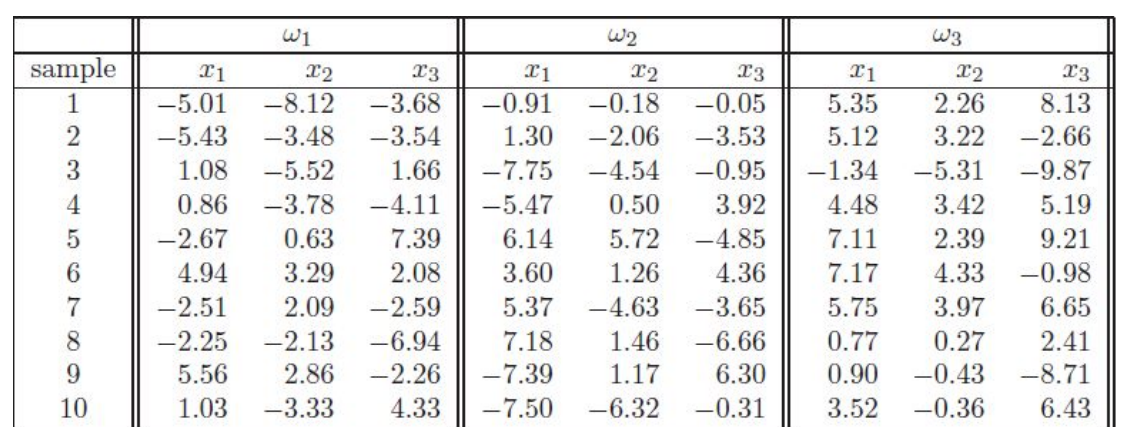




The following is the given discriminant function that we will use to classify the given data points.

$
g_i(x) = -\frac{1}{2}(x-\mu_i)^t\sum_i^{-1}(x-\mu_i)\ 
-\ \frac{d}{2}ln\ 2\pi\ 
-\ \frac{1}{2}ln\ |\sum_i|\ 
+\ ln\ P(\omega_i)
$

In [ ]:
# Import required libraries
import numpy as np
from numpy import log
from numpy.linalg import inv, det

Firstly we represent the data in array format.
- `data` is and array with each element as an array of data points in each class ($\omega_1, \omega_2, \omega_3$)
- Each datapoint is an array representing $[x_1, x_2, x_3]$
- `n` is the number of classes.

In [ ]:
n = 3
data = [
        # w1
        np.array([
            [-5.01, -8.12, -3.68],
            [-5.43, -3.48, -3.54],
            [1.08, -5.52, 1.66],
            [0.86, -3.78, -4.11],
            [-2.67, 0.63, 7.39],
            [4.94, 3.29, 2.08],
            [-2.51, 2.09, -2.59],
            [-2.25, -2.13, -6.94],
            [5.56, 2.86, -2.26],
            [1.03, -3.33, 4.33]
        ]),

        # w2
        np.array([
            [-0.91, -0.18, -0.05],
            [1.30, -2.06, -3.53],
            [-7.75, -4.54, -0.95],
            [-5.47, 0.50, 3.92],
            [6.14, 5.72, -4.85],
            [3.60, 1.26, 4.36],
            [5.37, -4.63, -3.65],
            [7.18, 1.46, -6.66],
            [-7.39, 1.17, 6.30],
            [-7.50, -6.32, -0.31]

        ]),

        # w3
        np.array([
            [5.35, 2.26, 8.13],
            [5.12, 3.22, -2.66],
            [-1.34, -5.31, -9.87],
            [4.48, 3.42, 5.19],
            [7.11, 2.39, 9.21],
            [7.17, 4.33, -0.98],
            [5.75, 3.97, 6.65],
            [0.77, 0.27, 2.41],
            [0.90, -0.43, -8.71],
            [3.52, -0.36, 6.43]
        ]) 
    ]

## Question 1
We need to represent the given discriminant function in code.

Firstly, we need to calculate the mean, covariance and set the prior probabilities that will be used by the discriminant function.

In [ ]:
mean = []
for i in range(len(data)):
    mean.append(data[i].mean(axis=0))
mean = np.array(mean)

cov = []
for i in range(len(data)):
    cov.append(np.cov(data[i].T))
cov = np.array(cov)

P = [1/2, 1/2, 0]

The following is the discriminant function

In [ ]:
def g(i: int, x: np.array, P: list):
    if P[i] == 0:
        return -np.inf
    
    # d is the dimension of input x
    d = x.shape[0]
    # Get the mean values based on given d
    mean_d = mean[:, 0:d]
    # Get the covariance values based on given d
    cov_d = cov[:, 0:d, 0:d]

    g = 0
    t = np.matmul(inv(cov_d[i]), (x - mean_d[i]))
    g += -0.5 * np.matmul((x - mean_d[i]).T, t)
    g += -0.5 * d * log(2 * np.pi)
    g += -0.5 * log(det(cov_d[i]))
    g += log(P[i])
    return g


Now, to test this discriminant function, we go through all data points and check the output for each class

In [ ]:
# Display discriminant values for all samples
for i in range(n):
    print("-"*10)
    print("Class w%d" % (i + 1))
    print("-"*10)
    for x in data[i]:
        print("Discriminant values for", x, end='\t')
        for i in range(n):
            print("w%d : %.3f\t" % (i+1, g(i, x, P)), end=' ')
        print()

----------
Class w1
----------
Discriminant values for [-5.01 -8.12 -3.68]	w1 : -8.897	 w2 : -9.888	 w3 : -inf	 
Discriminant values for [-5.43 -3.48 -3.54]	w1 : -8.380	 w2 : -9.087	 w3 : -inf	 
Discriminant values for [ 1.08 -5.52  1.66]	w1 : -8.696	 w2 : -10.442	 w3 : -inf	 
Discriminant values for [ 0.86 -3.78 -4.11]	w1 : -8.118	 w2 : -8.204	 w3 : -inf	 
Discriminant values for [-2.67  0.63  7.39]	w1 : -10.040	 w2 : -9.839	 w3 : -inf	 
Discriminant values for [4.94 3.29 2.08]	w1 : -8.665	 w2 : -9.084	 w3 : -inf	 
Discriminant values for [-2.51  2.09 -2.59]	w1 : -8.838	 w2 : -9.252	 w3 : -inf	 
Discriminant values for [-2.25 -2.13 -6.94]	w1 : -8.447	 w2 : -10.148	 w3 : -inf	 
Discriminant values for [ 5.56  2.86 -2.26]	w1 : -9.080	 w2 : -8.212	 w3 : -inf	 
Discriminant values for [ 1.03 -3.33  4.33]	w1 : -8.454	 w2 : -10.700	 w3 : -inf	 
----------
Class w2
----------
Discriminant values for [-0.91 -0.18 -0.05]	w1 : -7.585	 w2 : -7.544	 w3 : -inf	 
Discriminant values for [ 1.3  -2.0

## Question 2
Given problem states that we need to classify between 2 classes using priors as `[1/2, 1/2, 0]`


In [ ]:
# Set the priors as given 
P = [1/2, 1/2, 0]

### Question 2.a and 2.b
Given that we need to classify based on $x_1$ alone and calculate mislassification percentage.

We first write a function (`calssify(d)`) that would carry out classification for each data point using `d` features (for `d = 1`, feature $x_1$ is considered; for `d = 2`, features $x_1$ and $x_2$ are considered and so on)

In [ ]:
# Classify based on d features
def classify(d: int):
    # Display discriminant values for all samples
    miss_rates = []
    for i in range(n):
        print("-"*10)
        print("Class w%d" % (i + 1))
        print("-"*10)
        miss_count = 0
        total_count = 0
        for x in data[i]:
            print(x, "is classified as ", end='\t')
            gs = np.array([g(j, x[0:d], P) for j in range(n)])
            clas = np.argmax(gs)
            print("w%d" % (clas + 1))
            if clas != i:
                miss_count += 1
            total_count += 1
        miss_rate = (miss_count/total_count) * 100
        print("Misclassification rate: ", miss_rate, "%")
        miss_rates.append(miss_rate)

    error = np.round(np.mean(miss_rates), 3)

    print("Overall misclassification rate: ", error, "%")

Now, to classify each data point using $x_1$ alone, we run `classify(1)`

In [ ]:
# Classify for 1 feature (only x1)
classify(1)

----------
Class w1
----------
[-5.01 -8.12 -3.68] is classified as 	w1
[-5.43 -3.48 -3.54] is classified as 	w2
[ 1.08 -5.52  1.66] is classified as 	w1
[ 0.86 -3.78 -4.11] is classified as 	w1
[-2.67  0.63  7.39] is classified as 	w1
[4.94 3.29 2.08] is classified as 	w2
[-2.51  2.09 -2.59] is classified as 	w1
[-2.25 -2.13 -6.94] is classified as 	w1
[ 5.56  2.86 -2.26] is classified as 	w2
[ 1.03 -3.33  4.33] is classified as 	w1
Misclassification rate:  30.0 %
----------
Class w2
----------
[-0.91 -0.18 -0.05] is classified as 	w1
[ 1.3  -2.06 -3.53] is classified as 	w1
[-7.75 -4.54 -0.95] is classified as 	w2
[-5.47  0.5   3.92] is classified as 	w2
[ 6.14  5.72 -4.85] is classified as 	w2
[3.6  1.26 4.36] is classified as 	w1
[ 5.37 -4.63 -3.65] is classified as 	w2
[ 7.18  1.46 -6.66] is classified as 	w2
[-7.39  1.17  6.3 ] is classified as 	w2
[-7.5  -6.32 -0.31] is classified as 	w2
Misclassification rate:  30.0 %
----------
Class w3
----------
[5.35 2.26 8.13] is classifie

### Question 2.c
We need to repeat 2.a and 2.b but based on $x_1$ and $x_2$ and calculate mislassification percentage.

Now, to classify each data point using $x_1$ and $x_2$, we run `classify(2)`

In [ ]:
# Classify based on 2 features (x1 and x2)
classify(2)

----------
Class w1
----------
[-5.01 -8.12 -3.68] is classified as 	w1
[-5.43 -3.48 -3.54] is classified as 	w2
[ 1.08 -5.52  1.66] is classified as 	w1
[ 0.86 -3.78 -4.11] is classified as 	w1
[-2.67  0.63  7.39] is classified as 	w2
[4.94 3.29 2.08] is classified as 	w2
[-2.51  2.09 -2.59] is classified as 	w2
[-2.25 -2.13 -6.94] is classified as 	w1
[ 5.56  2.86 -2.26] is classified as 	w2
[ 1.03 -3.33  4.33] is classified as 	w1
Misclassification rate:  50.0 %
----------
Class w2
----------
[-0.91 -0.18 -0.05] is classified as 	w1
[ 1.3  -2.06 -3.53] is classified as 	w1
[-7.75 -4.54 -0.95] is classified as 	w2
[-5.47  0.5   3.92] is classified as 	w2
[ 6.14  5.72 -4.85] is classified as 	w2
[3.6  1.26 4.36] is classified as 	w1
[ 5.37 -4.63 -3.65] is classified as 	w2
[ 7.18  1.46 -6.66] is classified as 	w2
[-7.39  1.17  6.3 ] is classified as 	w2
[-7.5  -6.32 -0.31] is classified as 	w1
Misclassification rate:  40.0 %
----------
Class w3
----------
[5.35 2.26 8.13] is classifie

### Question 2.d
We need to repeat 2.a and 2.b but based on $x_1$, $x_2$ and $x_3$ (all 3 features) and calculate mislassification percentage.

Now, to classify each data point using all 3 features, we run `classify(3)`

In [ ]:
# Classify based on 3 features (all features x1, x2 and x3)
classify(3)

----------
Class w1
----------
[-5.01 -8.12 -3.68] is classified as 	w1
[-5.43 -3.48 -3.54] is classified as 	w1
[ 1.08 -5.52  1.66] is classified as 	w1
[ 0.86 -3.78 -4.11] is classified as 	w1
[-2.67  0.63  7.39] is classified as 	w2
[4.94 3.29 2.08] is classified as 	w1
[-2.51  2.09 -2.59] is classified as 	w1
[-2.25 -2.13 -6.94] is classified as 	w1
[ 5.56  2.86 -2.26] is classified as 	w2
[ 1.03 -3.33  4.33] is classified as 	w1
Misclassification rate:  20.0 %
----------
Class w2
----------
[-0.91 -0.18 -0.05] is classified as 	w2
[ 1.3  -2.06 -3.53] is classified as 	w2
[-7.75 -4.54 -0.95] is classified as 	w2
[-5.47  0.5   3.92] is classified as 	w2
[ 6.14  5.72 -4.85] is classified as 	w2
[3.6  1.26 4.36] is classified as 	w1
[ 5.37 -4.63 -3.65] is classified as 	w2
[ 7.18  1.46 -6.66] is classified as 	w2
[-7.39  1.17  6.3 ] is classified as 	w2
[-7.5  -6.32 -0.31] is classified as 	w2
Misclassification rate:  10.0 %
----------
Class w3
----------
[5.35 2.26 8.13] is classifie

### Question 2.e
In conclusion, we see that the error rates are as follows

| Number of features | Error  |
|--------------------|--------|
|1                   | 53.33% |
|2                   | 63.33% |
|3                   | 43.33% |

Hence, according to the error rate with respect to the number of features, for classification among the given classes, the order of better classifcation is - 3 features > 1 feature > 2 features.

Thus, taking all 3 features for classification yields the best results.

Following are the covariance matrices.



In [ ]:
cov

array([[[ 14.38051111,   7.69537778,   4.12232222],
        [  7.69537778,  14.62312111,   3.90684   ],
        [  4.12232222,   3.90684   ,  19.72453778]],

       [[ 36.82933444,   9.98092667, -16.36675111],
        [  9.98092667,  13.16855111,   0.40905111],
        [-16.36675111,   0.40905111,  18.42121778]],

       [[  8.30475667,   7.44494667,  13.14957778],
        [  7.44494667,   8.56044889,  11.60861111],
        [ 13.14957778,  11.60861111,  47.28728889]]])

We see that for covariance for 2 features (taking the 2x2 submatrix) is the lowest, followed by 1 feature being higher and 3 features being the highest. Since with 3 features we have the highest covariance, the features are more "independent" of each other and thus, the classifications are more accurate and the misclassification rate is the lowest.

### Question 2.f

We now classify the new test data points given. The data points are -

$(1, 2, 1)^t, (5, 3, 2)^t, (0, 0, 0)^t, (1, 0, 0)^t$

We first represent this data as an array

In [ ]:
test_data = np.array([[1, 2, 1],
                      [5, 3, 2],
                      [0, 0, 0],
                      [1, 0, 0]
])

The following functions executes the classification on `d` features from the test data.

In [ ]:
# Classify test data based on d features
def classify_test(d):
    # Display discriminant values for all samples
    for x in test_data:
        print(x, "is classified as ", end='\t')
        gs = np.array([g(j, x[0:d], P) for j in range(n)])
        clas = np.argmax(gs)
        print("w%d" % (clas + 1))

We first run classification using 1 feature ($x_1$ alone)

In [ ]:
classify_test(1)

[1 2 1] is classified as 	w1
[5 3 2] is classified as 	w2
[0 0 0] is classified as 	w1
[1 0 0] is classified as 	w1


We then run classification using 2 features ($x_1$ and $x_2$)


In [ ]:
classify_test(2)

[1 2 1] is classified as 	w1
[5 3 2] is classified as 	w2
[0 0 0] is classified as 	w1
[1 0 0] is classified as 	w1


Lastly we run classification using 3 features ($x_1$, $x_2$ and $x_3$)

In [ ]:
classify_test(3)

[1 2 1] is classified as 	w2
[5 3 2] is classified as 	w1
[0 0 0] is classified as 	w1
[1 0 0] is classified as 	w1
